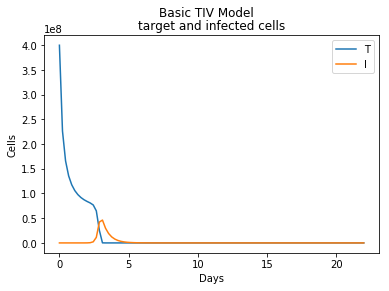

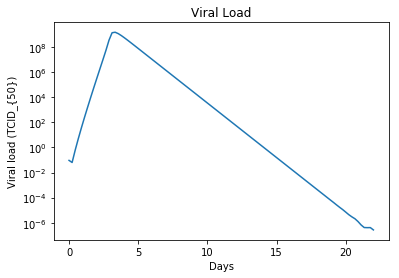

In [112]:
%matplotlib notebook
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters
pV = 210; 
beta = 5e-7; 
betap = 3e-8;
V0 = 1e+4; 
I0 = 0
T0 = 7e+7; 
gT = 0.8;
deltaV = 5; 
deltaI = 2;

time = np.linspace(0,22,100)
y_init = [4e+8, 0, 9.3e-2]

# TIV differential equations
def TIV(t, y): 
    T,I,V = y
    return [gT * T * (1 - (T+1)/T0) - (betap * V * T), 
            betap * T * V - (deltaI * I), 
            pV * I - (deltaV * V) - (beta * V * T)]

# Solve TIV
sol = solve_ivp(TIV, [time[0], time[-1]], y_init, method = 'RK45', t_eval = time)

# Plot
fig1, ax1 = plt.subplots()
fig1.suptitle("Basic TIV Model")

ax1.plot(sol.t,sol.y[0],sol.t,sol.y[1])
ax1.set_title("target and infected cells")
ax1.set_xlabel("Days")
ax1.set_ylabel("Cells")
ax1.legend(('T','I'))

fig1, ax2 = plt.subplots()
ax2.plot(sol.t,sol.y[2])
ax2.set_title('Viral Load')
ax2.set_xlabel("Days")
ax2.set_ylabel("Viral load (TCID_{50})")
ax2.set_yscale('log')


plt.show()

[1.00000000e-07 1.44444444e-07 1.88888889e-07 2.33333333e-07
 2.77777778e-07 3.22222222e-07 3.66666667e-07 4.11111111e-07
 4.55555556e-07 5.00000000e-07]


<IPython.core.display.Javascript object>


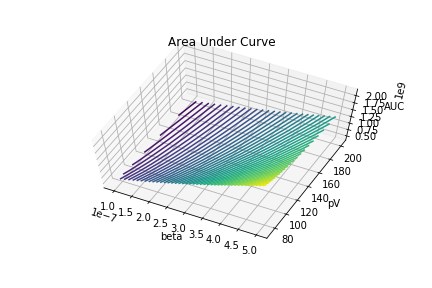

[[5.84226429e+08 7.27374000e+08 8.80704286e+08 1.04398967e+09
  1.21787952e+09 1.40164554e+09 1.58434589e+09 1.78886342e+09
  1.98875558e+09 2.18629480e+09]
 [5.40471792e+08 6.70535625e+08 8.10751352e+08 9.61382301e+08
  1.12073332e+09 1.28618388e+09 1.46100905e+09 1.64814157e+09
  1.83080902e+09 2.02845583e+09]
 [5.07443522e+08 6.27783668e+08 7.57137745e+08 8.96207268e+08
  1.04229861e+09 1.19713521e+09 1.36210414e+09 1.53162815e+09
  1.70321236e+09 1.89430002e+09]
 [4.81361723e+08 5.94058092e+08 7.15011089e+08 8.44157085e+08
  9.80606217e+08 1.12637912e+09 1.27873435e+09 1.43490378e+09
  1.59900613e+09 1.77865789e+09]
 [4.59339155e+08 5.66646987e+08 6.80583655e+08 8.02167132e+08
  9.31066864e+08 1.06545007e+09 1.20727240e+09 1.35560626e+09
  1.51288312e+09 1.68023641e+09]
 [4.39798520e+08 5.43241006e+08 6.52243699e+08 7.67510777e+08
  8.89356835e+08 1.01760457e+09 1.15253114e+09 1.29263856e+09
  1.44131063e+09 1.59671226e+09]
 [4.21888668e+08 5.22600220e+08 6.27784416e+08 7.37918575e

In [117]:
%matplotlib notebook


# Vary parameters for effect on AUC
Z_len = 10
beta_values = np.linspace(1e-7, 5e-7, Z_len)
print(beta_values)
pV_values = np.linspace(75, 200, Z_len)
# Create storage array for AUC values
AUC_values = np.zeros((Z_len, Z_len))

# Nested for loop to find AUC when varying two different parameters (beta and pV)

# Count where on array
beta_n = -1
pV_n = -1

for i in beta_values:
    beta = i
    beta_n += 1
    for j in pV_values:
        pV = j
        pV_n += 1
        if pV_n == Z_len:
            pV_n = 0
        
        # TIV differential equations
        def TIV(t, y): 
            T,I,V = y
            return [gT * T * (1 - (T+1)/T0) - (betap * V * T), 
                betap * T * V - (deltaI * I), 
                pV * I - (deltaV * V) - (beta * V * T)]

        # Solve TIV
        sol = solve_ivp(TIV, [time[0], time[-1]], y_init, method = 'RK45', t_eval = time)
        AUC_val = np.trapz(sol.y[2], sol.t)
    
        # Solve and store AUC
        AUC_values[beta_n, pV_n] = AUC_val

# Making surface plot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.contour3D(beta_values, pV_values, AUC_values, 50)

print(AUC_values)
ax.set_title('Area Under Curve')
ax.set_xlabel("beta")
ax.set_ylabel("pV")
ax.set_zlabel("AUC")



plt.show()
    

beta_N[1.00000000e-07 1.44444444e-07 1.88888889e-07 2.33333333e-07
 2.77777778e-07 3.22222222e-07 3.66666667e-07 4.11111111e-07
 4.55555556e-07 5.00000000e-07]


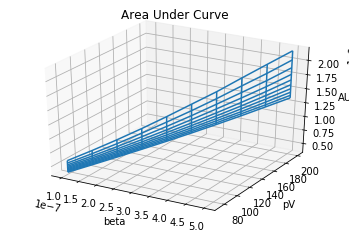

In [113]:
# Making surface plot

print('beta_N' + str(beta_values))
fig = plt.figure()
ax = plt.axes(projection='3d')
'''
X, Y = np.meshgrid(beta_values, pV_values)
Z = AUC_values
print(beta_values)
#print (X)
'''

ax.plot_wireframe(beta_values, pV_values, AUC_values)

#print(AUC_values)
ax.set_title('Area Under Curve')
ax.set_xlabel("beta")
ax.set_ylabel("pV")
ax.set_zlabel("AUC")



plt.show()
    

In [104]:
'''
Surface plot

Define matrix (set aside memory space)

store in array (matrix with x, y, z)
AUC = np.array zeros(m, n)

nested for loop 
for i in 1=m:
    for i in j in 1 = row:
        simulate model (Xidv and Yindv)
        
        AUC = matrix(m,n)
        for i in 1 = length of X:
            for j in 1 = length of Y:
                Xnew = X(i)
                Ynew = Y(j)
                sol = Simulate model
                AUC(i, j) = (sol)
        store value in array

        x = np.linspace(a, b, N)
        y = np.linspace(a, b, N)
        
'''

SyntaxError: invalid syntax (<ipython-input-104-c5c67bfb1614>, line 1)